<a href="https://colab.research.google.com/github/cwy20030/Machine-Learning-Workshop/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Diabetes dataset regression***

In this tutorial, we will learn how to perform regression using scikit-learn. The target variable is in the range 25-346, with 10 features distributed in the range of -0.2 and 0.2 and with 442 examples in total. Each example is an 1 * 10 vector.

Importing relevant packages and loading the dataset

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In the below snippet we can chose to either select a particular feature (wait!! how do we select a particular feature?) or all the features. Also, we split the dataset into train and test.

In [0]:
# Use only one feature
#diabetes_X = diabetes.data[:,]
d_M = np.matrix(diabetes.data)
diabetes_X = d_M[:]
#print(diabetes_X.shape, type(diabetes.data))

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# X_train, X_test = [], []
# for i in range(len(diabetes_X)):
# r = np.random.rand() ~[0,1]
# 70-30 
# if r>0.6:
#     X_test+=[diabetes_X[i]]
#   else:
#      X_train+=[diabetes_X[i]]
#   
# Split the targets into training/testing sets

#Low-sugar : 0 : 25 and 105
#Normal: 1 : 105 and 155
# High: 2 : >155
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
C_diabetes_y_train = np.zeros((422,1))
C_diabetes_y_test = np.zeros((20,1))
#
print(diabetes_y_train.shape)
for i in range(diabetes_y_train.shape[0]):
  if diabetes_y_train[i] < 105:
    C_diabetes_y_train[i,0] = 0
  elif diabetes_y_train[i] > 155:
    C_diabetes_y_train[i,0] = 2
  else:
    C_diabetes_y_train[i,0] = 1
    

(422,)


In [0]:
print(C_diabetes_y_train.shape, diabetes_X_train.shape)
def binns(array_1,array_2):
  for i in range(array_1.shape[0]):
    if array_2[i] < 105:
      array_1[i,0] = 0
    elif array_2[i] > 155:
      array_1[i,0] = 2
    else:
      array_1[i,0] = 1
  return array_1

(422, 1) (422, 10)


In [0]:
#model = KNeighborsClassifier(n_neighbors = 3)#NearestNeighbors(n_neighbors=1)
model = tree.DecisionTreeClassifier(max_depth = 3)

In [0]:
#regr = linear_model.LinearRegression(fit_intercept = True, normalize = True)
model.fit(diabetes_X_train,C_diabetes_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
#regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [0]:
diabetes_y_pred = model.predict(diabetes_X_test)

Printing the coefficients. Wait! hmmm... feature selection !

In [0]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


Performance metrics

In [0]:
#print("Mean squared error: %.2f"
#      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# 1
# 1-2
# 1-3
#... 1-10

print('Accuracy Measure', accuracy_score(diabetes_y_pred, C_diabetes_y_test))
#print(diabetes_y_train)

Accuracy Measure 0.7


In [0]:
tree.export_graphviz(model,out_file='rules.out')
f = open('rules.out','r')
fp = f.readlines()
#D = np.zeros(100,10)
print(fp)
line_index = 0
for line in fp: 
  print(line)

['digraph Tree {\n', 'node [shape=box] ;\n', '0 [label="X[8] <= -0.004\\ngini = 0.639\\nsamples = 422\\nvalue = [150, 87, 185]"] ;\n', '1 [label="X[2] <= 0.006\\ngini = 0.577\\nsamples = 206\\nvalue = [119, 44, 43]"] ;\n', '0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n', '2 [label="X[6] <= 0.021\\ngini = 0.479\\nsamples = 159\\nvalue = [109, 29, 21]"] ;\n', '1 -> 2 ;\n', '3 [label="gini = 0.58\\nsamples = 82\\nvalue = [47, 18, 17]"] ;\n', '2 -> 3 ;\n', '4 [label="gini = 0.329\\nsamples = 77\\nvalue = [62, 11, 4]"] ;\n', '2 -> 4 ;\n', '5 [label="X[0] <= -0.025\\ngini = 0.634\\nsamples = 47\\nvalue = [10, 15, 22]"] ;\n', '1 -> 5 ;\n', '6 [label="gini = 0.494\\nsamples = 18\\nvalue = [4, 2, 12]"] ;\n', '5 -> 6 ;\n', '7 [label="gini = 0.637\\nsamples = 29\\nvalue = [6, 13, 10]"] ;\n', '5 -> 7 ;\n', '8 [label="X[2] <= 0.015\\ngini = 0.508\\nsamples = 216\\nvalue = [31, 43, 142]"] ;\n', '0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n', '9 [label="X[8] <= 

Plotting the linear function on the dataset

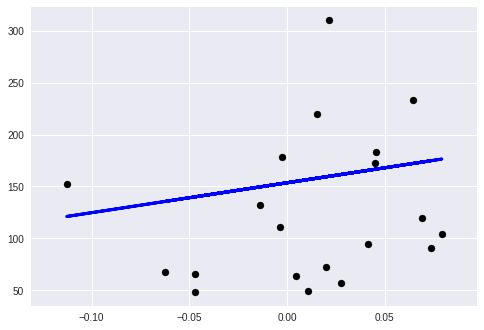

In [0]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()